In [46]:
import tensorflow as tf
import os
import cv2
import numpy as np
import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Load the dataset
data_dir ='data/Train/'
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(256, 256), batch_size=32)
num_classes = len(data.class_names)

Found 168 files belonging to 2 classes.


In [48]:

# Convert TensorFlow dataset to numpy arrays
x_data = []
y_data = []

In [49]:
for batch in data.as_numpy_iterator():
    x_data.extend(batch[0])
    y_data.extend(batch[1])

x_data = np.array(x_data)
y_data = np.array(y_data)

2024-05-23 13:55:15.358906: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [50]:
# Split the dataset into train, validation, and test sets
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

# Preprocess the data
x_train_scaled = x_train / 255.0
x_val_scaled = x_val / 255.0
x_test_scaled = x_test / 255.0

In [51]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(),
    # Conv2D(16, (3,3), activation='relu'),
    # MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
# Train model
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=20)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 321ms/step - accuracy: 0.5634 - loss: 11.5333 - val_accuracy: 0.4118 - val_loss: 12.2422
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step - accuracy: 0.5261 - loss: 7.6169 - val_accuracy: 0.5882 - val_loss: 6.3958
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 0.6642 - loss: 4.2694 - val_accuracy: 0.8529 - val_loss: 0.4027
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.6106 - loss: 1.2428 - val_accuracy: 0.8235 - val_loss: 0.3762
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - accuracy: 0.8864 - loss: 0.2630 - val_accuracy: 0.6471 - val_loss: 0.6553
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.8442 - loss: 0.3132 - val_accuracy: 0.6765 - val_loss: 0.5081
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.9255 - loss: 0.1284 - val_accuracy: 0.8529 - val_loss: 0.2956
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 249ms/step - accuracy: 1.0000 - loss: 0.0801 - val_accuracy: 0.9118 - val_los

In [54]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9099 - loss: 0.5276
Test Loss: 0.5168601870536804
Test Accuracy: 0.9117646813392639


In [55]:
np.save('x_train.npy', x_train)
np.save('y_train.npy', y_train)

# Define a function to plot images
def plot_images(images, labels, class_names, num_images=8):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.057128906..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.8187256..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imsho

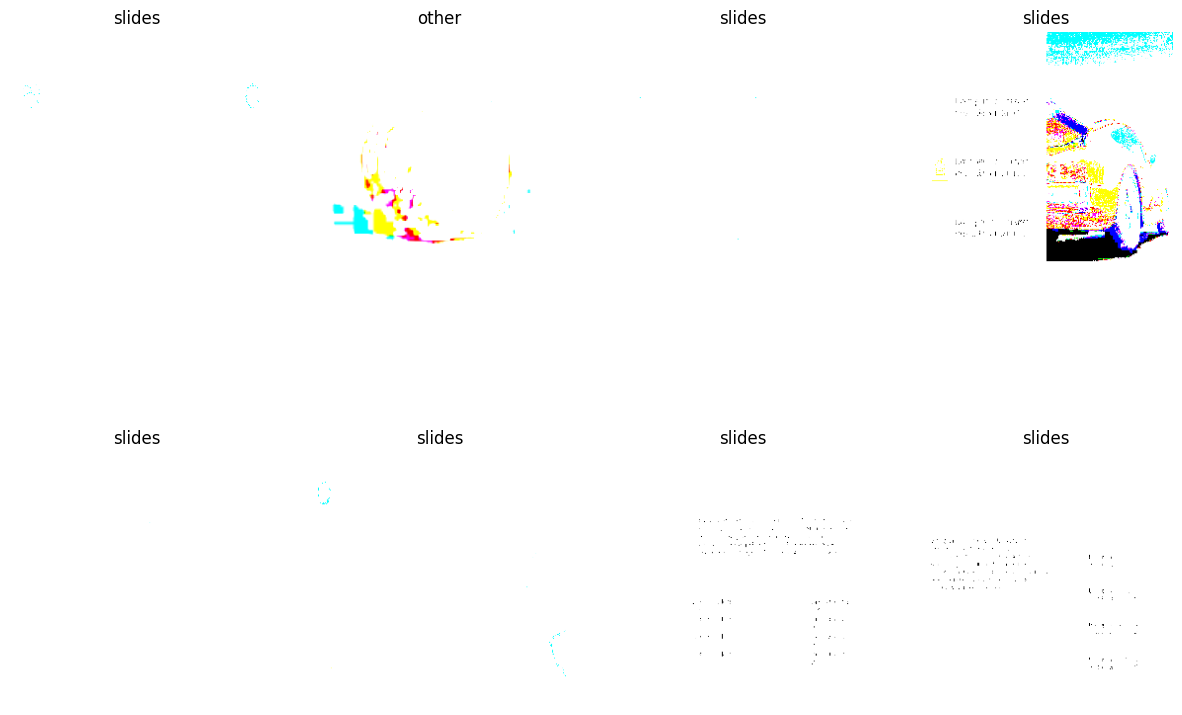

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.0637207..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..253.24199].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow wi

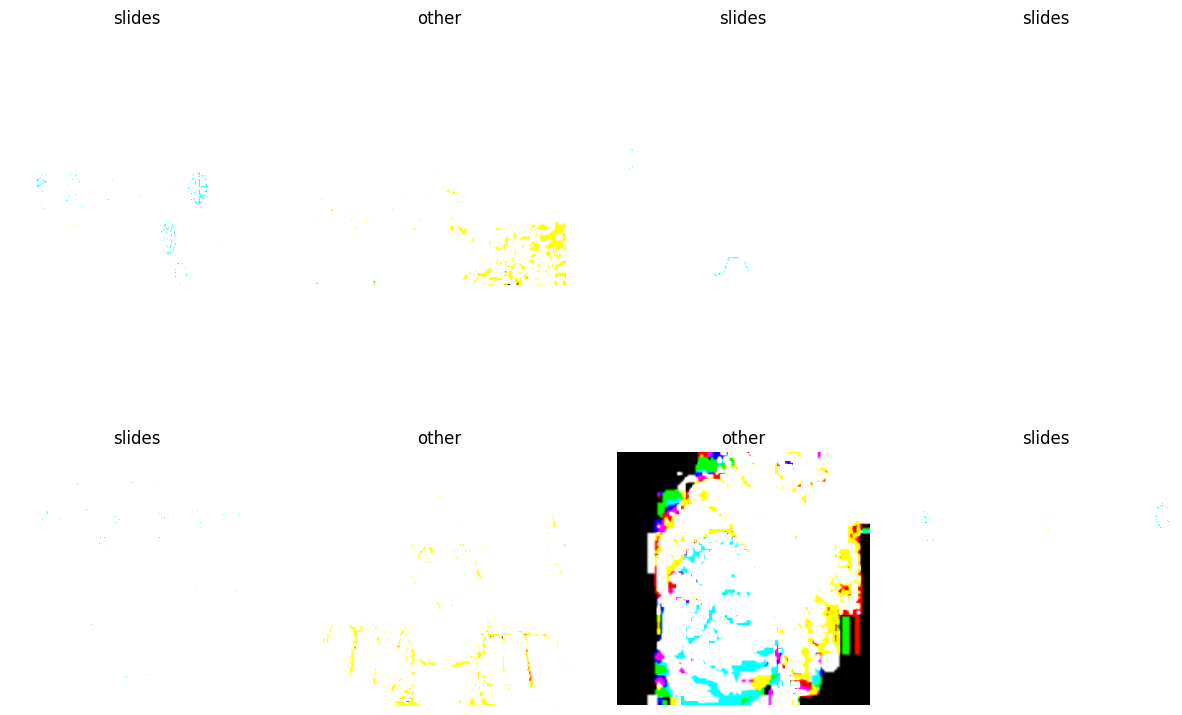

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


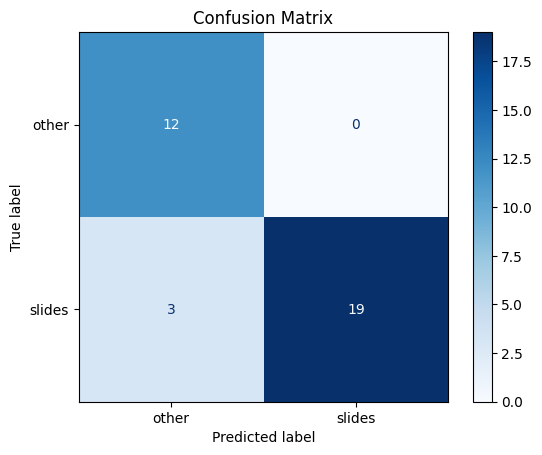

In [56]:
class_names = data.class_names

# Plot images from the train dataset
plot_images(x_train[:8], y_train[:8], class_names)

# Plot images from the test dataset
plot_images(x_test[:8], y_test[:8], class_names)

# Predict labels for test set
y_probs = model.predict(x_test_scaled)

# Get predicted classes (indices of the class with highest probability)
y_pred = np.argmax(y_probs, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [57]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming you have already loaded and preprocessed your data (x_data, y_data)

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy scores for each fold
cv_scores = []

# Define the model creation function
def create_model():
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
        MaxPooling2D(),
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        # Conv2D(16, (3,3), activation='relu'),
        # MaxPooling2D(),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(num_classes, activation='softmax')  # Assuming num_classes is defined
    ])
    return model

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(skf.split(x_data, y_data), 1):
    print(f"Fold {fold}:")
    
    # Split data into train and test sets for this fold
    x_train, x_test = x_data[train_index], x_data[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]
    
    # Preprocess the data (if needed)
    x_train_scaled = x_train / 255.0  # Assuming you want to scale pixel values
    x_test_scaled = x_test / 255.0
    
    # Create and train your model
    model = create_model()
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train_scaled, y_train, epochs=20, verbose=0)
    
    # Evaluate the model on the test set for this fold
    test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy}")
    
    # Store the accuracy score for this fold
    cv_scores.append(test_accuracy)

# Calculate and print the average accuracy across all folds
avg_accuracy = np.mean(cv_scores)
print(f"\nAverage Accuracy: {avg_accuracy}")


Fold 1:


/home/memoriesbytalha/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Accuracy: 1.0
Fold 2:
Test Accuracy: 0.9411764740943909
Fold 3:
Test Accuracy: 0.970588207244873
Fold 4:
Test Accuracy: 0.9090909361839294
Fold 5:
Test Accuracy: 0.939393937587738

Average Accuracy: 0.9520499110221863


In [58]:
model.save('New_model/new.h5')